In [1]:
import os, sys
#!{sys.executable} -m pip -q install palantir fa2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to avoid any possible jupyter crashes due to rpy2 not finding the R install on conda
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"

In [3]:
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout

by .GlobalEnv when processing object ‘aa’


In [4]:
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline
sc.set_figure_params()
scf.set_figure_pubready()

In [5]:
outDir = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/"

In [6]:
sc.settings.figdir = os.path.join(outDir, "figures/")

In [7]:
data_dir = os.path.expanduser("/groups/tanaka/People/current/jiwang/projects/RA_competence/results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/")
file_path = os.path.join(data_dir, "RNAmatrix_RA_d3_d5.h5ad")

In [131]:
# Load sample data
adata = sc.read(file_path, chunk_size=6000)

In [ ]:
## processing steps

In [132]:
#counts = palantir.io.from_csv('https://github.com/dpeerlab/Palantir/raw/master/data/marrow_sample_scseq_counts.csv.gz')
#norm_df = sc.pp.normalize_per_cell(counts,copy=True)
#norm_df = palantir.preprocess.log_transform(norm_df)
adata

AnnData object with n_obs × n_vars = 12000 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [133]:
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [134]:
palantir.preprocess.log_transform(adata)

In [135]:
#adata=sc.AnnData(norm_df)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='cell_ranger')
sc.pp.pca(adata, n_comps = 50)
pca_projections = pd.DataFrame(adata.obsm["X_pca"],index=adata.obs_names)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


In [136]:
adata

AnnData object with n_obs × n_vars = 12000 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [137]:
pca_projections

0          1         2         3   \
AAACGAACAACTTGGT-1_1_1_1_1_1_1 -11.290998  -1.011078  1.199719  1.045731   
AAAGAACAGAGGCGTT-1_1_1_1_1_1_1  -5.484653  -5.239730  7.043602  4.890637   
AAAGAACCATGTGTCA-1_1_1_1_1_1_1  -4.938413  -3.664924  2.065417  5.316105   
AAAGAACGTTCCTAAG-1_1_1_1_1_1_1  -5.434068  -5.383868  3.688719  6.432945   
AAAGAACTCTTCTAAC-1_1_1_1_1_1_1  -8.497457  -4.555292 -4.154723  3.635186   
...                                   ...        ...       ...       ...   
TTTGTTGAGACCATGG-1_2_1          12.229142  -5.488636 -7.482636 -1.303820   
TTTGTTGAGGTGGTTG-1_2_1          -0.919734  16.086647  3.100534  1.603399   
TTTGTTGCACGACCTG-1_2_1           6.935961  -0.912065 -5.968494 -2.979639   
TTTGTTGCATGACACT-1_2_1          12.336304  -5.451099 -7.644520  0.195636   
TTTGTTGGTCATCACA-1_2_1           6.785468  -4.316822 -8.857068  0.766311   

                                      4         5         6         7   \
AAACGAACAACTTGGT-1_1_1_1_1_1_1  0.554830  1.324205 -1.875024  1.032277   
AAAGAACAGAGGCGTT-1_1_1_1_1_1_1 -0.530759 -1.583238  0.131309  0.006144   
AAAGAACCATGTGTCA-1_1_1_1_1_1_1 -2.939087  2.737863 -0.374068 -3.395083   
AAAGAACGTTCCTAAG-1_1_1_1_1_1_1 -1.610725 -2.272541 -0.479139 -1.403666   
AAAGAACTCTTCTAAC-1_1_1_1_1_1_1  0.889392  0.841857 -1.612769  2.118206   
...                                  ...       ...       ...       ...   
TTTGTTGAGACCATGG-1_2_1          5.843950  1.129364 -0.530891 -0.258615   
TTTGTTGAGGTGGTTG-1_2_1          2.774588  1.969216 -0.430822  7.248868   
TTTGTTGCACGACCTG-1_2_1         -2.279614  6.352279  4.204635  1.350214   
TTTGTTGCATGACACT-1_2_1          4.442309  1.161880  0.395430 -3.227234   
TTTGTTGGTCATCACA-1_2_1          0.340512 -3.151817 -4.365187  1.719474   

                                      8         9   ...        40        41  \
AAACGAACAACTTGGT-1_1_1_1_1_1_1 -3.365714 -2.026826  ... -1.749521 -1.934625   
AAAGAACAGAGGCGTT-1_1_1_1_1_1_1  2.527067 -2.401195  ... -1.820803 -1.514932   
AAAGAACCATGTGTCA-1_1_1_1_1_1_1  3.679875 -0.920595  ... -1.601383  1.905001   
AAAGAACGTTCCTAAG-1_1_1_1_1_1_1  0.910086  0.309749  ...  1.274756 -0.241630   
AAAGAACTCTTCTAAC-1_1_1_1_1_1_1  2.020071 -0.865327  ... -1.429852  3.995676   
...                                  ...       ...  ...       ...       ...   
TTTGTTGAGACCATGG-1_2_1          2.783529 -0.978327  ...  1.079760 -0.019374   
TTTGTTGAGGTGGTTG-1_2_1         -1.573088 -0.330412  ...  1.351024  1.058155   
TTTGTTGCACGACCTG-1_2_1         -1.375114  1.290574  ... -0.456229 -0.758998   
TTTGTTGCATGACACT-1_2_1         -2.260235 -0.452512  ...  2.985249 -0.034720   
TTTGTTGGTCATCACA-1_2_1          1.544868  3.104169  ... -0.496471  0.854378   

                                      42        43        44        45  \
AAACGAACAACTTGGT-1_1_1_1_1_1_1  0.371178 -0.066774  1.886082 -1.026703   
AAAGAACAGAGGCGTT-1_1_1_1_1_1_1  0.318760  1.993431 -0.086139 -0.081768   
AAAGAACCATGTGTCA-1_1_1_1_1_1_1  0.860969 -0.110513  0.281682  1.352544   
AAAGAACGTTCCTAAG-1_1_1_1_1_1_1  0.766936  0.111255 -4.467027  2.357829   
AAAGAACTCTTCTAAC-1_1_1_1_1_1_1  1.034429  0.642119 -1.557219  1.341552   
...                                  ...       ...       ...       ...   
TTTGTTGAGACCATGG-1_2_1         -1.318665 -0.676558  0.064110 -0.612657   
TTTGTTGAGGTGGTTG-1_2_1          1.702885  1.634948  0.995079  1.577019   
TTTGTTGCACGACCTG-1_2_1          2.062977  1.213849  1.755130 -1.754846   
TTTGTTGCATGACACT-1_2_1          0.578841 -1.586100 -0.196118 -0.464243   
TTTGTTGGTCATCACA-1_2_1          0.261408 -3.712711 -0.888521 -1.233046   

                                      46        47        48        49  
AAACGAACAACTTGGT-1_1_1_1_1_1_1 -2.475308 -1.648063 -0.056824 -2.085313  
AAAGAACAGAGGCGTT-1_1_1_1_1_1_1  1.678785  1.066824  2.030449  1.141683  
AAAGAACCATGTGTCA-1_1_1_1_1_1_1 -0.422904  1.041523  0.653037  2.195858  
AAAGAACGTTCCTAAG-1_1_1_1_1_1_1  0.195025  0.616136 -0.765277  1.946691  
AAAGAACTCTTCTAAC-1_1_1_1_1_1_1 -0.

In [138]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [139]:
dm_res

{'T': <12000x12000 sparse matrix of type '<class 'numpy.float64'>'
 	with 532086 stored elements in Compressed Sparse Row format>,
 'EigenVectors':                                        0         1         2         3  \
 AAACGAACAACTTGGT-1_1_1_1_1_1_1 -0.009129  0.009909 -0.001591  0.010165   
 AAAGAACAGAGGCGTT-1_1_1_1_1_1_1 -0.009129  0.009403 -0.000848  0.010071   
 AAAGAACCATGTGTCA-1_1_1_1_1_1_1 -0.009129  0.009295 -0.000871  0.009615   
 AAAGAACGTTCCTAAG-1_1_1_1_1_1_1 -0.009129  0.009355 -0.000878  0.009802   
 AAAGAACTCTTCTAAC-1_1_1_1_1_1_1 -0.009129  0.010032 -0.001296  0.011426   
 ...                                  ...       ...       ...       ...   
 TTTGTTGAGACCATGG-1_2_1         -0.009129 -0.012312  0.014555  0.003279   
 TTTGTTGAGGTGGTTG-1_2_1         -0.009129 -0.004364 -0.012444 -0.014267   
 TTTGTTGCACGACCTG-1_2_1         -0.009129 -0.002257  0.006462 -0.003700   
 TTTGTTGCATGACACT-1_2_1         -0.009129 -0.011114  0.015490  0.002057   
 TTTGTTGGTCATCACA-1_2_1     

In [140]:
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=4)

In [141]:
ms_data
adata.obsm["X_palantir"]=ms_data.values
adata.obsm["X_umap_seurat"] = adata.obsm["X_umap"]

In [142]:
# generate neighbor draph in multiscale diffusion space
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_palantir")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [143]:
adata

AnnData object with n_obs × n_vars = 12000 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap', 'X_palantir', 'X_umap_seurat'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [148]:
# draw ForceAtlas2 embedding using 2 first PCs as initial positions
adata.obsm["X_pca2d"]=adata.obsm["X_umap_seurat"][:,:2]
sc.tl.draw_graph(adata, init_pos='X_pca2d')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:27)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

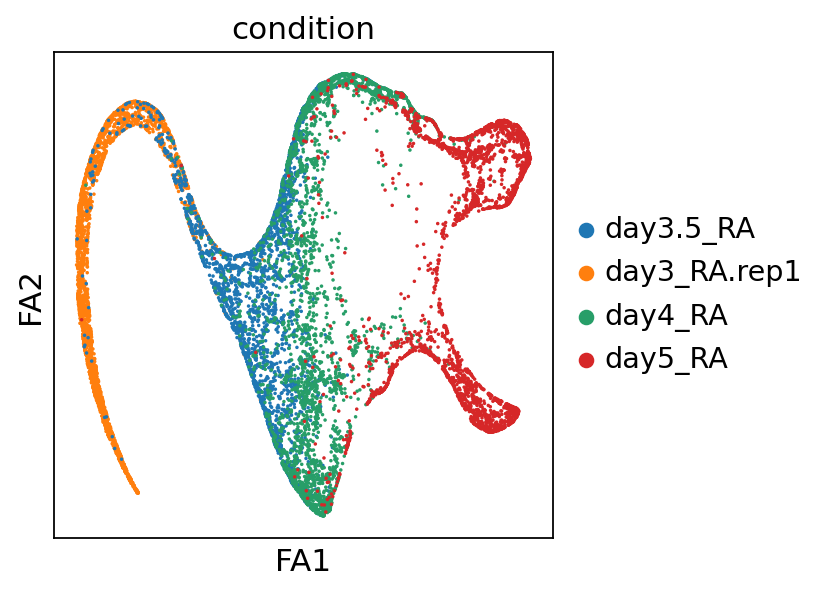

In [149]:
sc.pl.draw_graph(adata, color="condition",color_map="RdBu_r")
#sc.pl.draw_graph(adata, color="Foxa2",color_map="RdBu_r");
#sc.pl.draw_graph(adata, color="Pax6",color_map="RdBu_r");

In [154]:
# run umap in scanpy
#sc.pp.neighbors(ad, n_pcs = 80, use_rep = 'X_css', metric = 'cosine', n_neighbors = 30, method = 'umap')
sc.pp.neighbors(adata, n_neighbors=30, metric = 'cosine', use_rep="X_pca")


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

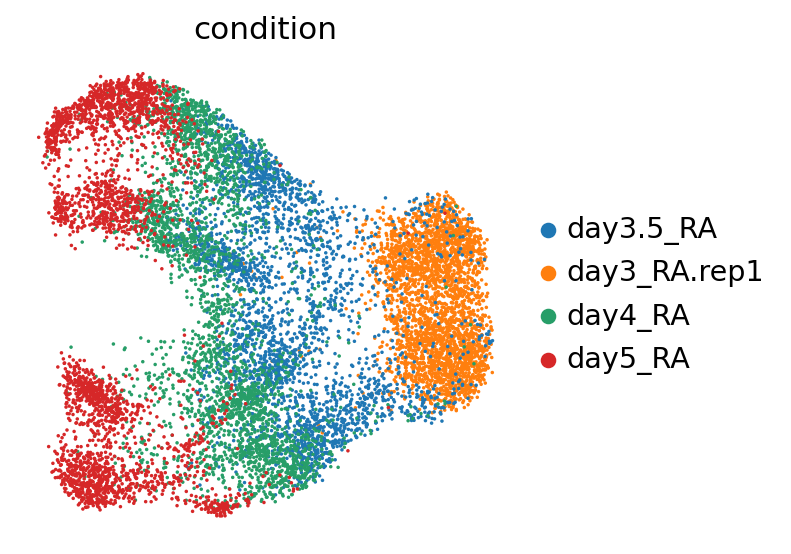

In [156]:
sc.tl.umap(adata, min_dist=0.3)
sc.pl.embedding(
    adata,
    basis="umap",
    color = 'condition',
    frameon=False,
)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

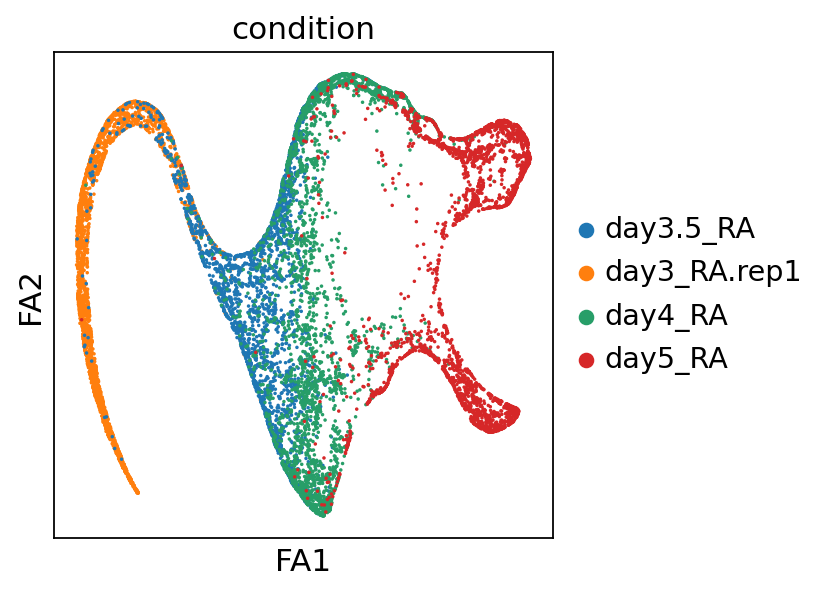

In [157]:
sc.pl.draw_graph(adata, color="condition")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

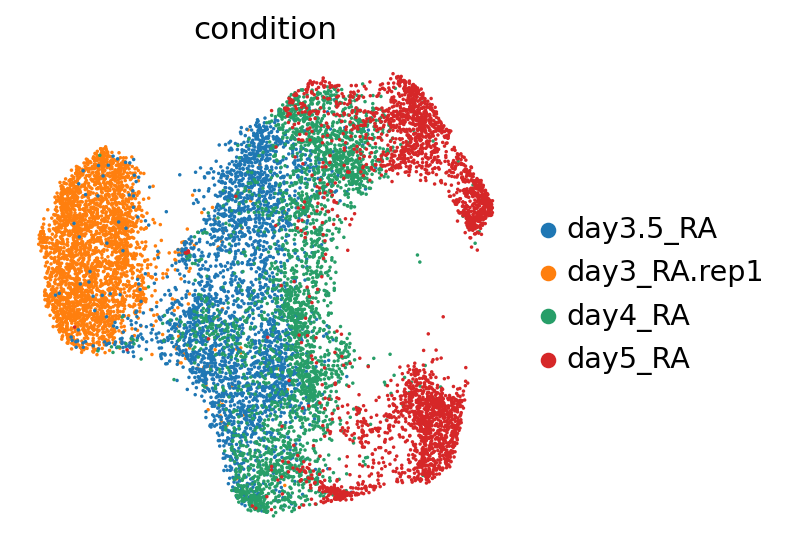

In [11]:
sc.pl.embedding(
    adata,
    basis="X_umap_seurat",
    color = 'condition',
    frameon=False,
)

In [ ]:
#Tree learning with SimplePPT

inferring a principal tree --> parameters used 
    200 principal points, sigma = 0.1, lambda = 200, metric = euclidean
    fitting:  51%|█████     | 102/200 [00:07<00:07, 13.67it/s]
    converged
    finished (0:00:07) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

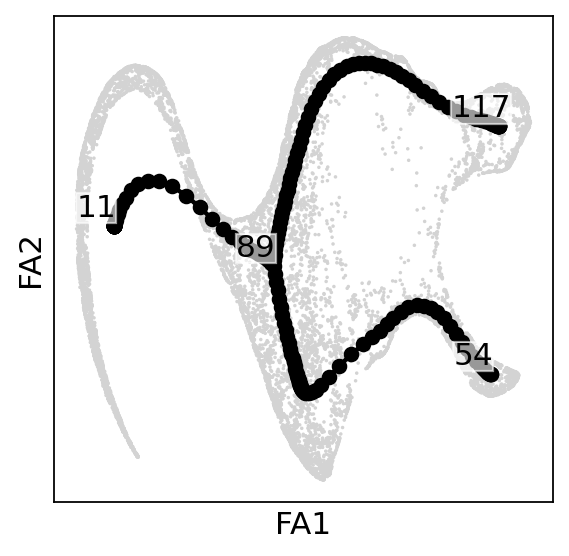

In [23]:
scf.tl.tree(adata,method="ppt", Nodes=200, use_rep="palantir",
            device="cpu",
            seed=1,
            ppt_lambda=200,
            ppt_sigma=0.1,
            ppt_nsteps=200)
# projecting results onto ForceAtlas2 embedding
scf.pl.graph(adata)

In [24]:
# Selecting a root and computing pseudotime
# Using CD34 marker, we can confidently tell that the tip 163 is the root.
scf.tl.root(adata, 11)

node 11 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [25]:
# Here we are going to generate 100 mappings of pseudotime, to account for cell asssignment uncertainty. 
# to .obs will be saved the mean of all calculated pseudotimes.
# exmaple data takes > 360G memory and 16 nodes
scf.tl.pseudotime(adata, seed=42, n_jobs=20,n_map=100)

projecting cells onto the principal graph
    mappings:   0%|          | 0/100 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    mappings: 100%|██████████| 100/100 [03:15<00:00,  1.95s/it] 
    finished (0:03:22) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [26]:
adata

AnnData object with n_obs × n_vars = 12000 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'umap', 'seg_colors'
    obsm: 'X_R', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [27]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'), compression="gzip")

In [28]:
# del adatax

In [9]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'),chunk_size=6000)

In [10]:
adata

AnnData object with n_obs × n_vars = 12000 × 18813
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_counts', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'umap'
    obsm: 'X_R', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


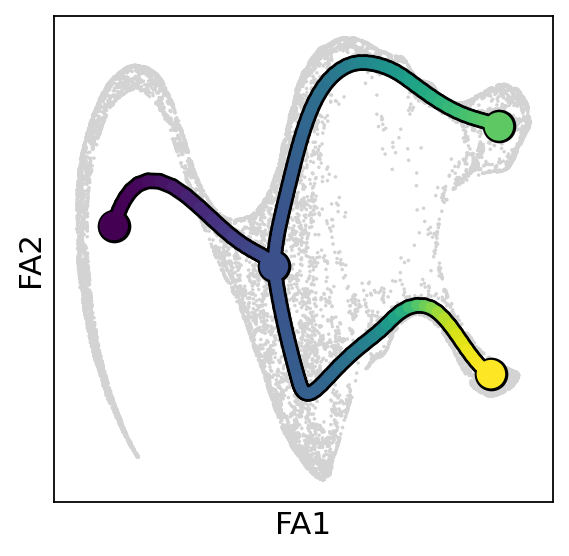

In [11]:
# Representing the trajectory and tree on top of existing embedding
scf.pl.trajectory(adata)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

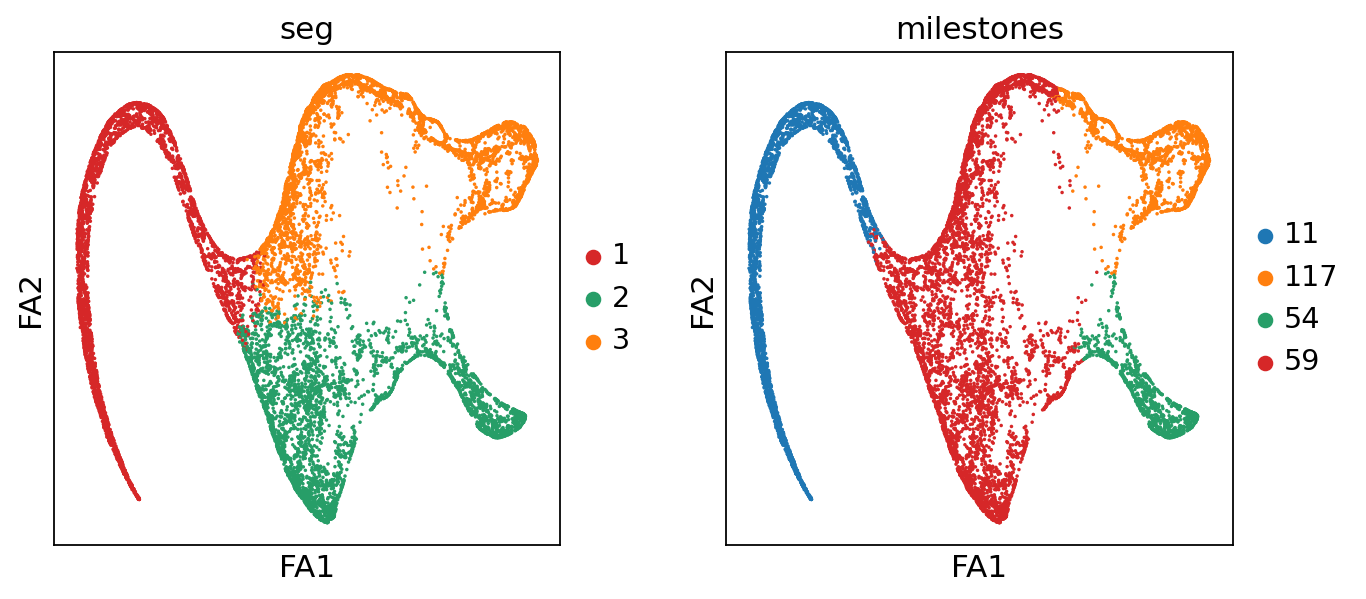

In [12]:
sc.pl.draw_graph(adata,color=["seg","milestones"])


In [13]:
scf.tl.rename_milestones(adata,["Root","FP","NP","Bifu"])
# we change the color of the root milestone for better visualisations
adata.uns["milestones_colors"][3]="#17bece"

In [14]:
from pathlib import Path
Path(os.path.join(outDir, "figures/")).mkdir(parents=True, exist_ok=True)

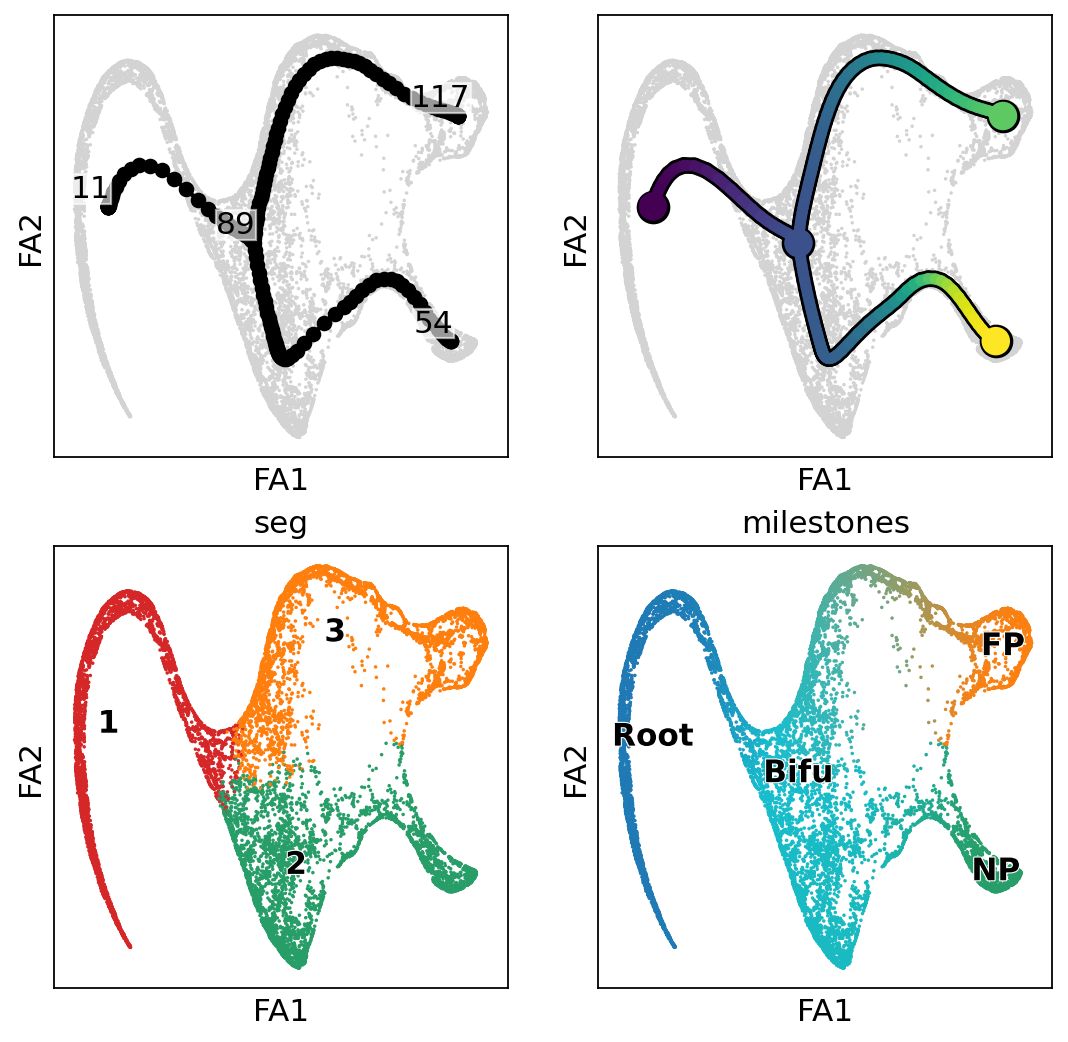

In [15]:
sc.set_figure_params()
fig, axs=plt.subplots(2,2,figsize=(8,8))
axs=axs.ravel()
scf.pl.graph(adata,basis="draw_graph_fa",show=False,ax=axs[0])
scf.pl.trajectory(adata,basis="draw_graph_fa",show=False,ax=axs[1])
sc.pl.draw_graph(adata,color=["seg"],legend_loc="on data",show=False,ax=axs[2],legend_fontoutline=True)
scf.pl.milestones(adata,ax=axs[3],show=False,annotate=True)
plt.savefig(os.path.join(outDir, "figures/A.pdf"),dpi=300)

In [16]:
# as a dendrogram representation (take some 5-10 minutes)
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [13:20<00:00, 266.87s/it]
    finished (0:13:20) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


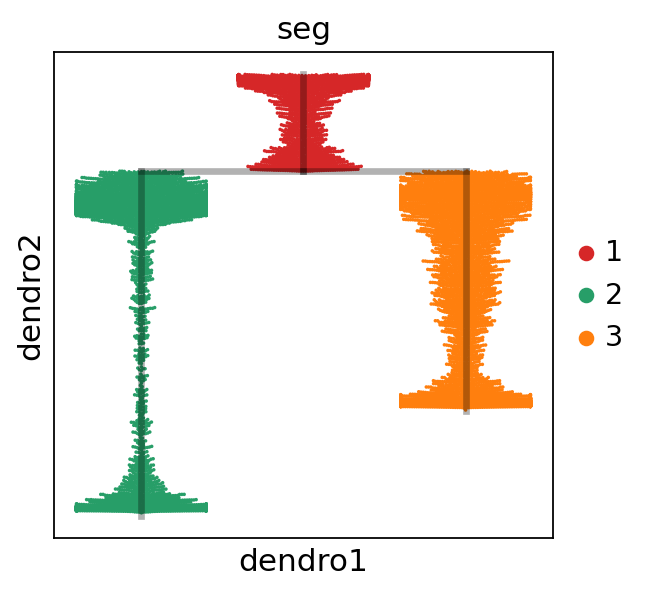

In [17]:
scf.pl.dendrogram(adata,color="seg")

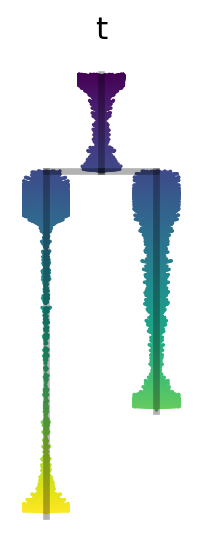

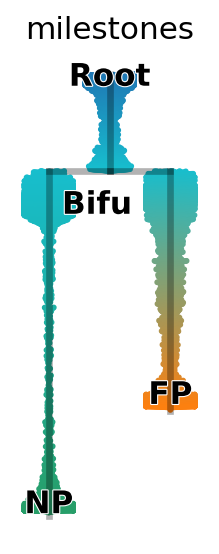

In [18]:
sc.set_figure_params(figsize=(1.5,4),frameon=False,dpi_save=300)
scf.pl.dendrogram(adata,color="t",show_info=False,
                  save="B1.pdf",
                  cmap="viridis")
scf.pl.dendrogram(adata,color="milestones",legend_loc="on data",
                  color_milestones=True,legend_fontoutline=True, 
                  save="B2.pdf")


In [19]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'), compression="gzip")

In [8]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'),chunk_size=6000)

In [ ]:
# Test and fit features associated with the tree
scf.tl.test_association(adata,n_jobs=20)

test features for association with the trajectory
    single mapping :   0%|          | 0/18813 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 2/18813 [01:12<189:00:39, 36.17s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 3/18813 [01:13<128:19:25, 24.56s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 4/18813 [01:14<97:15:59, 18.62s/it] 

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 6/18813 [01:15<65:45:40, 12.59s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 41/18813 [01:22<10:29:08,  2.01s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 43/18813 [01:22<10:03:37,  1.93s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 46/18813 [01:23<9:24:52,  1.81s/it] 

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 163/18813 [02:15<4:18:20,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 182/18813 [02:31<4:18:41,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 187/18813 [02:36<4:20:08,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 199/18813 [02:39<4:08:59,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 214/18813 [02:52<4:09:23,  1.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|▏         | 259/18813 [03:04<3:40:06,  1.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|▏         | 264/18813 [03:05<3:37:18,  1.42it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 285/18813 [03:19<3:36:20,  1.43it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 291/18813 [03:27<3:39:46,  1.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 298/18813 [03:37<3:45:02,  1.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 309/18813 [03:42<3:42:15,  1.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 345/18813 [03:51<3:26:22,  1.49it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 393/18813 [04:00<3:08:02,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 394/18813 [04:09<3:14:13,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 402/18813 [04:27<3:23:53,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 405/18813 [04:32<3:26:25,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 418/18813 [04:40<3:26:03,  1.49it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 446/18813 [04:49<3:18:40,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 488/18813 [05:03<3:09:58,  1.61it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 498/18813 [05:12<3:11:38,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 529/18813 [05:23<3:06:29,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 537/18813 [05:34<3:09:46,  1.61it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 539/18813 [05:39<3:11:40,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 543/18813 [05:45<3:13:52,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 547/18813 [05:53<3:16:30,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 553/18813 [06:00<3:18:15,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 563/18813 [06:05<3:17:21,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 619/18813 [06:13<3:02:56,  1.66it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 644/18813 [06:18<2:58:07,  1.70it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 648/18813 [06:27<3:01:13,  1.67it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 665/18813 [06:47<3:05:10,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 666/18813 [06:50<3:06:37,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 673/18813 [07:07<3:12:13,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 681/18813 [07:11<3:11:25,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 692/18813 [07:17<3:10:54,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 778/18813 [07:32<2:54:58,  1.72it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 789/18813 [07:48<2:58:25,  1.68it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 793/18813 [07:53<2:59:29,  1.67it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 795/18813 [07:56<3:00:10,  1.67it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 801/18813 [08:09<3:03:25,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 806/18813 [08:23<3:07:21,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 807/18813 [08:29<3:09:26,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 824/18813 [08:36<3:07:51,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 914/18813 [08:56<2:54:57,  1.71it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 923/18813 [09:02<2:55:18,  1.70it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 928/18813 [09:12<2:57:24,  1.68it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 934/18813 [09:29<3:01:44,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 936/18813 [09:38<3:04:06,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 940/18813 [09:44<3:05:07,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 971/18813 [09:56<3:02:46,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 1033/18813 [10:08<2:54:38,  1.70it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1057/18813 [10:20<2:53:37,  1.70it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1058/18813 [10:26<2:55:05,  1.69it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1060/18813 [10:35<2:57:16,  1.67it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1070/18813 [10:49<2:59:24,  1.65it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1074/18813 [10:57<3:00:54,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1102/18813 [11:05<2:58:19,  1.66it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1154/18813 [11:17<2:52:49,  1.70it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1172/18813 [11:26<2:52:19,  1.71it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1176/18813 [11:35<2:53:51,  1.69it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1183/18813 [11:42<2:54:35,  1.68it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1186/18813 [11:51<2:56:15,  1.67it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1187/18813 [12:00<2:58:24,  1.65it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1197/18813 [12:16<3:00:33,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▋         | 1211/18813 [12:24<3:00:27,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1332/18813 [12:56<2:49:46,  1.72it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1339/18813 [13:09<2:51:43,  1.70it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1344/18813 [13:37<2:57:03,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1347/18813 [13:51<2:59:38,  1.62it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1414/18813 [14:16<2:55:44,  1.65it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1453/18813 [14:28<2:52:53,  1.67it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1474/18813 [14:48<2:54:12,  1.66it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1481/18813 [15:11<2:57:49,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1483/18813 [15:20<2:59:13,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1501/18813 [15:31<2:59:06,  1.61it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1542/18813 [15:39<2:55:21,  1.64it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1592/18813 [15:47<2:50:50,  1.68it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1600/18813 [16:02<2:52:37,  1.66it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1602/18813 [16:10<2:53:50,  1.65it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1610/18813 [16:23<2:55:13,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1612/18813 [16:47<2:59:06,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1628/18813 [16:56<2:58:50,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1672/18813 [17:05<2:55:13,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1730/18813 [17:30<2:52:55,  1.65it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1735/18813 [17:38<2:53:38,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1740/18813 [17:44<2:54:05,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1741/18813 [17:56<2:55:58,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1743/18813 [18:02<2:56:40,  1.61it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1751/18813 [18:10<2:57:10,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1755/18813 [18:16<2:57:36,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1809/18813 [18:27<2:53:26,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1857/18813 [18:43<2:50:55,  1.65it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1861/18813 [18:55<2:52:21,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1862/18813 [19:10<2:54:35,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1866/18813 [19:14<2:54:49,  1.62it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1870/18813 [19:23<2:55:38,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1876/18813 [19:31<2:56:19,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1940/18813 [19:56<2:53:28,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1985/18813 [20:03<2:49:59,  1.65it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1992/18813 [20:16<2:51:12,  1.64it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1995/18813 [20:27<2:52:30,  1.62it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1999/18813 [20:37<2:53:32,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2003/18813 [20:43<2:53:57,  1.61it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2013/18813 [20:57<2:54:57,  1.60it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2110/18813 [21:32<2:50:28,  1.63it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2122/18813 [21:42<2:50:42,  1.63it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2127/18813 [21:56<2:52:09,  1.62it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2132/18813 [22:06<2:52:55,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2135/18813 [22:09<2:53:02,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2138/18813 [22:25<2:54:56,  1.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2164/18813 [22:45<2:55:08,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2205/18813 [23:00<2:53:20,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2264/18813 [23:29<2:51:43,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2268/18813 [23:44<2:53:10,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2274/18813 [23:51<2:53:30,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2275/18813 [24:01<2:54:37,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2281/18813 [24:10<2:55:11,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2285/18813 [24:21<2:56:14,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2350/18813 [24:36<2:52:23,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2388/18813 [24:52<2:51:08,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2397/18813 [25:01<2:51:23,  1.60it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2398/18813 [25:11<2:52:28,  1.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2401/18813 [25:21<2:53:16,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2402/18813 [25:28<2:54:03,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2403/18813 [25:33<2:54:34,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2413/18813 [25:40<2:54:32,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2445/18813 [25:49<2:52:53,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2541/18813 [26:18<2:48:27,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2548/18813 [26:24<2:48:32,  1.61it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2553/18813 [26:41<2:50:02,  1.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2558/18813 [26:55<2:51:03,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2561/18813 [27:04<2:51:47,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2563/18813 [27:13<2:52:39,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2589/18813 [27:26<2:51:55,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2660/18813 [27:43<2:48:21,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2667/18813 [28:00<2:49:34,  1.59it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2674/18813 [28:04<2:49:26,  1.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2675/18813 [28:13<2:50:16,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2677/18813 [28:22<2:51:02,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2678/18813 [28:27<2:51:30,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2684/18813 [28:36<2:51:56,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2690/18813 [28:53<2:53:09,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2809/18813 [29:12<2:46:23,  1.60it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2824/18813 [29:32<2:47:16,  1.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2825/18813 [29:52<2:49:05,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2829/18813 [30:06<2:50:04,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2830/18813 [30:14<2:50:46,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2855/18813 [30:46<2:52:03,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2952/18813 [31:12<2:47:40,  1.58it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2953/18813 [31:20<2:48:20,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2957/18813 [31:39<2:49:46,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2958/18813 [31:55<2:51:05,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2960/18813 [32:04<2:51:44,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2968/18813 [32:14<2:52:08,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3112/18813 [32:54<2:46:03,  1.58it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3116/18813 [33:18<2:47:48,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3119/18813 [33:32<2:48:47,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3140/18813 [33:56<2:49:25,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3251/18813 [34:32<2:45:20,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3254/18813 [34:46<2:46:14,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3257/18813 [35:03<2:47:26,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3258/18813 [35:08<2:47:48,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3261/18813 [35:14<2:48:04,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3266/18813 [35:21<2:48:19,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3389/18813 [35:58<2:43:41,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3390/18813 [36:03<2:44:02,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3396/18813 [36:12<2:44:21,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3399/18813 [36:31<2:45:39,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3400/18813 [36:36<2:45:57,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3401/18813 [36:51<2:47:01,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▊        | 3482/18813 [37:15<2:44:02,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3534/18813 [37:35<2:42:29,  1.57it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3536/18813 [37:52<2:43:40,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3542/18813 [38:10<2:44:35,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3544/18813 [38:13<2:44:41,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3555/18813 [38:32<2:45:24,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3624/18813 [38:50<2:42:47,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3663/18813 [39:06<2:41:46,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3668/18813 [39:25<2:42:48,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3670/18813 [39:42<2:43:51,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3671/18813 [39:47<2:44:06,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3695/18813 [40:06<2:44:07,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3797/18813 [40:24<2:39:49,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3801/18813 [40:28<2:39:53,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3804/18813 [40:42<2:40:38,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3808/18813 [40:52<2:41:02,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3810/18813 [40:56<2:41:13,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3813/18813 [41:04<2:41:34,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3814/18813 [41:23<2:42:47,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3820/18813 [41:29<2:42:51,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3864/18813 [41:47<2:41:40,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3956/18813 [42:09<2:38:21,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3962/18813 [42:22<2:38:49,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3964/18813 [42:27<2:39:04,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3967/18813 [42:41<2:39:47,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3969/18813 [42:44<2:39:51,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3972/18813 [42:52<2:40:10,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3976/18813 [43:08<2:40:57,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3991/18813 [43:14<2:40:34,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4080/18813 [43:33<2:37:18,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4102/18813 [43:53<2:37:26,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4106/18813 [44:00<2:37:36,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4112/18813 [44:22<2:38:39,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4117/18813 [44:29<2:38:50,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4120/18813 [44:37<2:39:07,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4219/18813 [45:01<2:35:44,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4220/18813 [45:10<2:36:13,  1.56it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4238/18813 [45:22<2:36:03,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4243/18813 [45:33<2:36:25,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4246/18813 [45:53<2:37:27,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4247/18813 [46:03<2:37:59,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4249/18813 [46:14<2:38:29,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4373/18813 [46:33<2:33:43,  1.57it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4377/18813 [46:48<2:34:21,  1.56it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4379/18813 [47:04<2:35:11,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4385/18813 [47:13<2:35:23,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4386/18813 [47:21<2:35:47,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4389/18813 [47:29<2:36:02,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4392/18813 [47:40<2:36:32,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4394/18813 [47:43<2:36:36,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4405/18813 [47:54<2:36:40,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4512/18813 [48:24<2:33:26,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4513/18813 [48:27<2:33:32,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4524/18813 [48:37<2:33:35,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4526/18813 [48:54<2:34:21,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4530/18813 [49:03<2:34:40,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4534/18813 [49:11<2:34:56,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4539/18813 [49:26<2:35:27,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4640/18813 [49:49<2:32:12,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4660/18813 [50:09<2:32:21,  1.55it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4663/18813 [50:17<2:32:36,  1.55it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4665/18813 [50:30<2:33:10,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4669/18813 [50:34<2:33:13,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4672/18813 [50:49<2:33:51,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4673/18813 [51:00<2:34:19,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4690/18813 [51:09<2:34:02,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4698/18813 [51:13<2:33:53,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4793/18813 [51:44<2:31:21,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4799/18813 [51:57<2:31:44,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4805/18813 [52:06<2:31:55,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4814/18813 [52:23<2:32:21,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4822/18813 [52:38<2:32:43,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4867/18813 [53:07<2:32:14,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4878/18813 [53:08<2:31:49,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4908/18813 [53:14<2:30:50,  1.54it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4950/18813 [53:34<2:30:03,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4953/18813 [54:10<2:31:37,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4958/18813 [54:17<2:31:42,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5041/18813 [54:51<2:29:51,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5073/18813 [55:01<2:29:02,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5076/18813 [55:12<2:29:24,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5082/18813 [55:36<2:30:14,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5083/18813 [55:46<2:30:40,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5128/18813 [56:07<2:29:45,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5207/18813 [56:28<2:27:33,  1.54it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5208/18813 [56:50<2:28:29,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5218/18813 [56:58<2:28:25,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5223/18813 [57:07<2:28:39,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5227/18813 [57:19<2:29:00,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5229/18813 [57:31<2:29:25,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5234/18813 [57:38<2:29:31,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5325/18813 [58:05<2:27:07,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5350/18813 [58:18<2:26:43,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5352/18813 [58:27<2:27:02,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5356/18813 [58:36<2:27:15,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5357/18813 [58:52<2:27:53,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5359/18813 [58:59<2:28:05,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 5369/18813 [59:16<2:28:26,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5489/18813 [59:55<2:25:26,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5491/18813 [1:00:01<2:25:37,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5501/18813 [1:00:21<2:26:03,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5504/18813 [1:00:31<2:26:20,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5505/18813 [1:00:37<2:26:33,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5510/18813 [1:00:47<2:26:47,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5596/18813 [1:01:06<2:24:19,  1.53it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5597/18813 [1:01:21<2:24:52,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5617/18813 [1:01:30<2:24:30,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5618/18813 [1:01:39<2:24:49,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5624/18813 [1:01:54<2:25:11,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5653/18813 [1:02:23<2:25:14,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5755/18813 [1:02:58<2:22:52,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5760/18813 [1:03:07<2:23:02,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5767/18813 [1:03:16<2:23:08,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5770/18813 [1:03:36<2:23:48,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5772/18813 [1:03:43<2:23:59,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5808/18813 [1:03:53<2:23:03,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5881/18813 [1:04:30<2:21:50,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5898/18813 [1:04:37<2:21:29,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5903/18813 [1:04:41<2:21:29,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5904/18813 [1:04:52<2:21:51,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5909/18813 [1:05:05<2:22:07,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5914/18813 [1:05:12<2:22:13,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5915/18813 [1:05:20<2:22:28,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5939/18813 [1:05:23<2:21:45,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5964/18813 [1:05:29<2:21:04,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6038/18813 [1:05:57<2:19:32,  1.53it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6043/18813 [1:06:13<2:19:57,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6047/18813 [1:06:31<2:20:26,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6051/18813 [1:06:42<2:20:40,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6061/18813 [1:06:49<2:20:35,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 6103/18813 [1:07:12<2:19:58,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6159/18813 [1:07:20<2:18:22,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6177/18813 [1:07:51<2:18:48,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6179/18813 [1:08:05<2:19:13,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6181/18813 [1:08:21<2:19:41,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6256/18813 [1:08:39<2:17:48,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6312/18813 [1:09:13<2:17:05,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6314/18813 [1:09:43<2:18:01,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6320/18813 [1:09:53<2:18:09,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6362/18813 [1:10:07<2:17:14,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6434/18813 [1:10:36<2:15:50,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6447/18813 [1:10:46<2:15:45,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6448/18813 [1:10:52<2:15:54,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6450/18813 [1:11:10<2:16:25,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6453/18813 [1:11:18<2:16:35,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6459/18813 [1:11:31<2:16:48,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6581/18813 [1:12:10<2:14:08,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6585/18813 [1:12:25<2:14:29,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6591/18813 [1:12:30<2:14:27,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6597/18813 [1:12:46<2:14:44,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6599/18813 [1:12:52<2:14:52,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6616/18813 [1:13:16<2:15:04,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6696/18813 [1:13:29<2:12:59,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6708/18813 [1:13:51<2:13:16,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6711/18813 [1:13:59<2:13:25,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6722/18813 [1:14:23<2:13:48,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6743/18813 [1:14:47<2:13:53,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6830/18813 [1:15:07<2:11:47,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6842/18813 [1:15:19<2:11:48,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6844/18813 [1:15:30<2:12:03,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6846/18813 [1:15:38<2:12:14,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6847/18813 [1:15:45<2:12:23,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6854/18813 [1:15:59<2:12:35,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6857/18813 [1:16:05<2:12:40,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6974/18813 [1:16:46<2:10:20,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6981/18813 [1:16:49<2:10:12,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6985/18813 [1:16:56<2:10:16,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6988/18813 [1:17:01<2:10:20,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6998/18813 [1:17:13<2:10:22,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7066/18813 [1:17:48<2:09:21,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7108/18813 [1:18:17<2:08:55,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7115/18813 [1:18:24<2:08:54,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7117/18813 [1:18:29<2:08:59,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7124/18813 [1:18:39<2:09:04,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7129/18813 [1:18:52<2:09:15,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7131/18813 [1:18:59<2:09:24,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7142/18813 [1:19:08<2:09:19,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7144/18813 [1:19:16<2:09:28,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7251/18813 [1:19:41<2:07:04,  1.52it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7254/18813 [1:19:45<2:07:04,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7258/18813 [1:19:55<2:07:14,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7263/18813 [1:20:19<2:07:44,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7265/18813 [1:20:31<2:07:59,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7334/18813 [1:20:58<2:06:44,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7372/18813 [1:21:09<2:05:57,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7387/18813 [1:21:18<2:05:46,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7390/18813 [1:21:27<2:05:54,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7395/18813 [1:21:49<2:06:20,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7426/18813 [1:22:24<2:06:22,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7523/18813 [1:22:45<2:04:11,  1.52it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7528/18813 [1:22:55<2:04:18,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7537/18813 [1:23:16<2:04:35,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7539/18813 [1:23:26<2:04:46,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7540/18813 [1:23:28<2:04:48,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7541/18813 [1:23:34<2:04:56,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7594/18813 [1:23:57<2:04:02,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7629/18813 [1:24:09<2:03:21,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7664/18813 [1:24:29<2:02:55,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7670/18813 [1:24:36<2:02:55,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7677/18813 [1:24:55<2:03:10,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7681/18813 [1:25:04<2:03:18,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7688/18813 [1:25:13<2:03:18,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7695/18813 [1:25:19<2:03:16,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████▏     | 7795/18813 [1:25:45<2:01:13,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████▏     | 7801/18813 [1:25:54<2:01:16,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7808/18813 [1:26:06<2:01:22,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7816/18813 [1:26:16<2:01:22,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7822/18813 [1:26:30<2:01:33,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7830/18813 [1:26:47<2:01:44,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7831/18813 [1:27:00<2:02:01,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7895/18813 [1:27:12<2:00:36,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7927/18813 [1:27:30<2:00:09,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7943/18813 [1:27:44<2:00:04,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7945/18813 [1:27:52<2:00:11,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7950/18813 [1:28:09<2:00:27,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7952/18813 [1:28:14<2:00:31,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7957/18813 [1:28:22<2:00:34,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8046/18813 [1:28:47<1:58:48,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8069/18813 [1:29:02<1:58:33,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8077/18813 [1:29:20<1:58:44,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8079/18813 [1:29:30<1:58:56,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8082/18813 [1:29:35<1:58:57,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8084/18813 [1:29:44<1:59:05,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8085/18813 [1:29:57<1:59:22,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 8168/18813 [1:30:14<1:57:36,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8219/18813 [1:30:48<1:57:03,  1.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8220/18813 [1:30:53<1:57:08,  1.51it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8222/18813 [1:31:04<1:57:19,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8223/18813 [1:31:18<1:57:34,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8225/18813 [1:31:25<1:57:41,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8227/18813 [1:31:36<1:57:52,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8237/18813 [1:31:54<1:57:59,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8351/18813 [1:32:36<1:56:01,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8352/18813 [1:32:44<1:56:10,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8357/18813 [1:32:57<1:56:18,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8360/18813 [1:33:05<1:56:24,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8362/18813 [1:33:14<1:56:32,  1.49it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8368/18813 [1:33:22<1:56:33,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8420/18813 [1:33:31<1:55:26,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8474/18813 [1:34:02<1:54:44,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8492/18813 [1:34:10<1:54:27,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8504/18813 [1:34:25<1:54:27,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8506/18813 [1:34:40<1:54:43,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8510/18813 [1:34:48<1:54:47,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8516/18813 [1:34:56<1:54:48,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8536/18813 [1:35:17<1:54:43,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8606/18813 [1:35:39<1:53:26,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8625/18813 [1:35:56<1:53:19,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8628/18813 [1:36:04<1:53:24,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8635/18813 [1:36:11<1:53:23,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8636/18813 [1:36:15<1:53:25,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8642/18813 [1:36:23<1:53:27,  1.49it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8644/18813 [1:36:34<1:53:36,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8716/18813 [1:36:49<1:52:10,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8739/18813 [1:37:09<1:52:00,  1.50it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8764/18813 [1:37:32<1:51:50,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8771/18813 [1:37:52<1:52:03,  1.49it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8776/18813 [1:37:58<1:52:03,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8797/18813 [1:38:16<1:51:53,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8803/18813 [1:38:21<1:51:51,  1.49it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8856/18813 [1:38:34<1:50:50,  1.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


In [ ]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2.h5ad'), compression="gzip")

In [ ]:
sc.set_figure_params()
scf.pl.test_association(adata)
plt.savefig("figures/C_v2.pdf",dpi=300)

In [28]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    single mapping :   5%|▍         | 154/3393 [00:18<06:28,  8.34it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 159/3393 [01:04<21:49,  2.47it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 166/3393 [01:20<26:11,  2.05it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 201/3393 [01:29<23:43,  2.24it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 210/3393 [01:31<23:06,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 234/3393 [01:36<21:39,  2.43it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 247/3393 [01:39<21:08,  2.48it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 256/3393 [01:44<21:15,  2.46it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 269/3393 [01:56<22:33,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 281/3393 [01:59<21:58,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 317/3393 [02:08<20:43,  2.47it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 325/3393 [02:12<20:46,  2.46it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 339/3393 [02:26<21:56,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 345/3393 [02:31<22:15,  2.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 355/3393 [02:37<22:27,  2.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 369/3393 [02:43<22:23,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 379/3393 [02:46<22:05,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 397/3393 [02:52<21:43,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 416/3393 [03:00<21:34,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 425/3393 [03:03<21:24,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 444/3393 [03:07<20:43,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 460/3393 [03:14<20:39,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 475/3393 [03:18<20:20,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 489/3393 [03:25<20:21,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 500/3393 [03:33<20:36,  2.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 520/3393 [03:41<20:25,  2.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 526/3393 [03:45<20:31,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 537/3393 [03:51<20:33,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 541/3393 [03:53<20:28,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 542/3393 [03:56<20:45,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▋        | 552/3393 [04:02<20:46,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▋        | 558/3393 [04:05<20:48,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 562/3393 [04:06<20:44,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 570/3393 [04:10<20:40,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 587/3393 [04:14<20:15,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 601/3393 [04:18<20:00,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 616/3393 [04:23<19:48,  2.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▊        | 628/3393 [04:27<19:38,  2.35it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 649/3393 [04:34<19:22,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 666/3393 [04:40<19:09,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 684/3393 [04:49<19:05,  2.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 694/3393 [04:57<19:18,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 704/3393 [05:03<19:18,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 714/3393 [05:08<19:18,  2.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██▏       | 725/3393 [05:13<19:15,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 733/3393 [05:16<19:08,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 744/3393 [05:20<19:00,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 754/3393 [05:25<18:57,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 769/3393 [05:29<18:44,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 787/3393 [05:34<18:26,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 806/3393 [05:40<18:14,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 814/3393 [05:42<18:04,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 821/3393 [05:45<18:01,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 827/3393 [05:48<18:01,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 861/3393 [06:04<17:52,  2.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 876/3393 [06:13<17:53,  2.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 884/3393 [06:14<17:44,  2.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 901/3393 [06:23<17:41,  2.35it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 907/3393 [06:30<17:49,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 922/3393 [06:35<17:40,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 934/3393 [06:38<17:29,  2.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 944/3393 [06:41<17:22,  2.35it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 957/3393 [06:45<17:13,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 969/3393 [06:50<17:07,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 992/3393 [07:01<16:59,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 1008/3393 [07:03<16:43,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 1014/3393 [07:10<16:50,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 1029/3393 [07:14<16:38,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 1035/3393 [07:17<16:37,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 1041/3393 [07:21<16:37,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 1046/3393 [07:25<16:39,  2.35it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 1064/3393 [07:31<16:28,  2.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 1083/3393 [07:40<16:21,  2.35it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 1095/3393 [07:41<16:09,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 1113/3393 [07:48<16:00,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 1119/3393 [07:51<15:59,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 1125/3393 [07:55<15:57,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 1137/3393 [08:00<15:52,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 1166/3393 [08:10<15:36,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 1181/3393 [08:18<15:32,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 1186/3393 [08:21<15:33,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 1195/3393 [08:26<15:31,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 1205/3393 [08:29<15:25,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 1217/3393 [08:34<15:19,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 1223/3393 [08:37<15:17,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 1240/3393 [08:42<15:07,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 1250/3393 [08:46<15:03,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 1259/3393 [08:50<14:59,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 1273/3393 [08:54<14:50,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 1285/3393 [08:59<14:44,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 1290/3393 [09:04<14:48,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 1308/3393 [09:09<14:35,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 1314/3393 [09:12<14:34,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 1330/3393 [09:18<14:25,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 1348/3393 [09:26<14:19,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 1359/3393 [09:31<14:14,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 1374/3393 [09:37<14:07,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 1377/3393 [09:38<14:06,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 1389/3393 [09:45<14:04,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 1391/3393 [09:46<14:03,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 1409/3393 [09:53<13:55,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 1415/3393 [09:56<13:54,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 1446/3393 [10:03<13:32,  2.40it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 1448/3393 [10:06<13:34,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 1469/3393 [10:16<13:27,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 1475/3393 [10:19<13:26,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 1488/3393 [10:25<13:21,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 1507/3393 [10:32<13:10,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 1517/3393 [10:36<13:07,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 1526/3393 [10:41<13:04,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 1536/3393 [10:44<12:59,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 1543/3393 [10:49<12:58,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 1562/3393 [10:54<12:47,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 1574/3393 [11:02<12:45,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 1592/3393 [11:07<12:35,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 1595/3393 [11:08<12:34,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 1607/3393 [11:15<12:30,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 1621/3393 [11:18<12:21,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 1628/3393 [11:21<12:18,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 1644/3393 [11:29<12:13,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 1663/3393 [11:35<12:03,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 1673/3393 [11:39<11:59,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 1686/3393 [11:47<11:56,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 1688/3393 [11:48<11:55,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 1712/3393 [11:57<11:44,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 1722/3393 [11:59<11:38,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████▏    | 1742/3393 [12:09<11:30,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 1764/3393 [12:18<11:22,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 1769/3393 [12:21<11:21,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 1777/3393 [12:25<11:18,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 1789/3393 [12:29<11:11,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 1792/3393 [12:32<11:11,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 1806/3393 [12:39<11:07,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 1811/3393 [12:42<11:06,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 1829/3393 [12:47<10:55,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 1857/3393 [12:55<10:41,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 1864/3393 [12:58<10:38,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 1894/3393 [13:15<10:29,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 1902/3393 [13:17<10:25,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 1906/3393 [13:20<10:24,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 1911/3393 [13:24<10:23,  2.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 1913/3393 [13:27<10:24,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 1924/3393 [13:33<10:20,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▊    | 1987/3393 [13:48<09:46,  2.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 1994/3393 [13:51<09:43,  2.40it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 2000/3393 [13:55<09:41,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 2024/3393 [14:09<09:34,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 2054/3393 [14:21<09:21,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 2059/3393 [14:22<09:18,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 2072/3393 [14:29<09:14,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████▏   | 2083/3393 [14:37<09:12,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 2088/3393 [14:40<09:10,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 2104/3393 [14:44<09:01,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 2116/3393 [14:49<08:56,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 2128/3393 [14:51<08:50,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 2140/3393 [14:58<08:45,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 2180/3393 [15:11<08:27,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 2207/3393 [15:21<08:15,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 2210/3393 [15:24<08:14,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 2216/3393 [15:32<08:15,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 2218/3393 [15:33<08:14,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 2284/3393 [15:54<07:43,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 2292/3393 [16:02<07:42,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 2301/3393 [16:12<07:41,  2.37it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 2334/3393 [16:29<07:29,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 2347/3393 [16:40<07:26,  2.35it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 2351/3393 [16:49<07:27,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 2386/3393 [17:06<07:13,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 2391/3393 [17:07<07:10,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 2410/3393 [17:23<07:05,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 2412/3393 [17:25<07:05,  2.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 2414/3393 [17:26<07:04,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 2415/3393 [17:26<07:03,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 2416/3393 [17:27<07:03,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 2424/3393 [17:33<07:01,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 2426/3393 [17:37<07:01,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 2427/3393 [17:37<07:01,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 2463/3393 [17:45<06:42,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 2475/3393 [17:47<06:36,  2.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 2504/3393 [18:02<06:24,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 2541/3393 [18:09<06:05,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 2546/3393 [18:15<06:04,  2.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 2561/3393 [18:23<05:58,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 2585/3393 [18:35<05:48,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 2607/3393 [18:50<05:40,  2.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 2617/3393 [18:59<05:37,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 2620/3393 [19:02<05:37,  2.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 2622/3393 [19:05<05:36,  2.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 2630/3393 [19:10<05:33,  2.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 2650/3393 [19:17<05:24,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 2679/3393 [19:25<05:10,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 2711/3393 [19:33<04:55,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 2723/3393 [19:37<04:49,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 2751/3393 [19:53<04:38,  2.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 2781/3393 [20:10<04:26,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 2783/3393 [20:13<04:25,  2.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 2818/3393 [20:33<04:11,  2.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 2829/3393 [20:38<04:06,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 2832/3393 [20:43<04:06,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 2843/3393 [20:51<04:02,  2.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 2852/3393 [20:55<03:58,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 2859/3393 [20:56<03:54,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 2911/3393 [21:14<03:31,  2.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 2916/3393 [21:17<03:28,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 2948/3393 [21:32<03:15,  2.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 2951/3393 [21:35<03:14,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 2975/3393 [21:43<03:03,  2.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 2981/3393 [21:52<03:01,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 2984/3393 [21:53<03:00,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 2990/3393 [21:55<02:57,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 3051/3393 [22:21<02:30,  2.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 3052/3393 [22:25<02:30,  2.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 3066/3393 [22:41<02:25,  2.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 3068/3393 [22:42<02:24,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 3084/3393 [22:48<02:17,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 3093/3393 [22:54<02:13,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 3128/3393 [23:01<01:57,  2.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 3133/3393 [23:04<01:54,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 3182/3393 [23:26<01:33,  2.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 3194/3393 [23:38<01:28,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 3195/3393 [23:39<01:27,  2.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 3260/3393 [24:05<00:58,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 3264/3393 [24:07<00:57,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▋| 3268/3393 [24:08<00:55,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▋| 3272/3393 [24:14<00:53,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 3307/3393 [24:34<00:38,  2.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 3309/3393 [24:36<00:37,  2.24it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 3322/3393 [24:51<00:31,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 3323/3393 [24:51<00:31,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 3330/3393 [24:53<00:28,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 3331/3393 [24:53<00:27,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▊| 3350/3393 [24:59<00:19,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 3379/3393 [25:13<00:06,  2.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 3382/3393 [25:31<00:04,  2.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 3386/3393 [25:54<00:03,  2.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 3389/3393 [26:12<00:01,  2.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 3390/3393 [26:15<00:01,  2.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|██████████| 3393/3393 [26:36<00:00,  2.13it/s]
    finished (adata subsetted to keep only fitted features!) (0:26:43) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

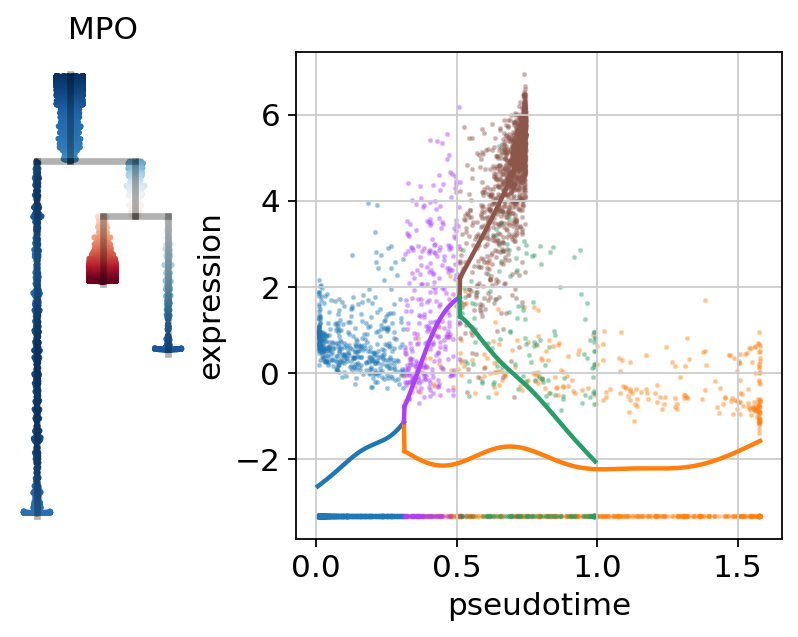

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

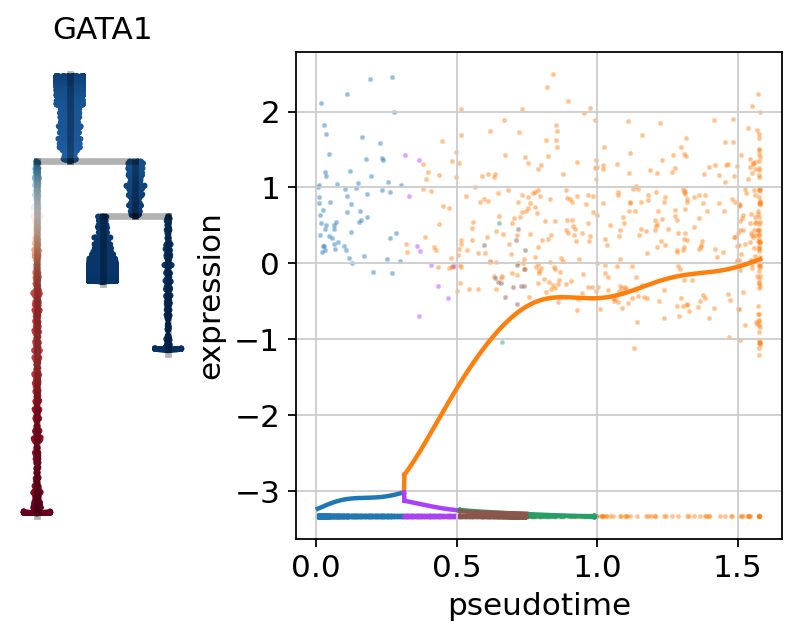

In [29]:
# Plotting single features
sc.set_figure_params(figsize=(.8,4),frameon=False)
scf.set_figure_pubready()
scf.pl.single_trend(adata,"MPO",basis="dendro",wspace=-.25,save="_E1.pdf")
scf.pl.single_trend(adata,"GATA1",basis="dendro",wspace=-.25,save="_E2.pdf")

In [30]:
# All branches DE analysis
scf.tl.test_fork(adata,root_milestone="Root",milestones=["DC","Mono","Ery"],n_jobs=20,rescale=True)


testing fork
    single mapping
    Differential expression:   7%|▋         | 224/3393 [00:51<12:07,  4.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:   7%|▋         | 240/3393 [02:03<26:58,  1.95it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:   8%|▊         | 281/3393 [02:07<23:30,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:   9%|▉         | 318/3393 [02:10<21:06,  2.43it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  10%|▉         | 324/3393 [02:17<21:40,  2.36it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  12%|█▏        | 414/3393 [02:45<19:48,  2.51it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  14%|█▍        | 491/3393 [03:16<19:22,  2.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  15%|█▍        | 492/3393 [04:17<25:16,  1.91it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  17%|█▋        | 589/3393 [04:28<21:16,  2.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  18%|█▊        | 596/3393 [04:31<21:15,  2.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  22%|██▏       | 732/3393 [05:06<18:35,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  22%|██▏       | 760/3393 [05:43<19:48,  2.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  23%|██▎       | 775/3393 [06:22<21:32,  2.03it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  23%|██▎       | 779/3393 [06:23<21:25,  2.03it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  23%|██▎       | 790/3393 [06:24<21:08,  2.05it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  26%|██▌       | 868/3393 [06:36<19:14,  2.19it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  26%|██▌       | 889/3393 [06:38<18:41,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  26%|██▋       | 893/3393 [06:44<18:52,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  29%|██▉       | 995/3393 [07:20<17:42,  2.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  30%|██▉       | 1002/3393 [07:43<18:25,  2.16it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 1035/3393 [07:49<17:49,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 1036/3393 [07:51<17:52,  2.20it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 1053/3393 [08:01<17:49,  2.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███▏      | 1068/3393 [08:06<17:38,  2.20it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  32%|███▏      | 1091/3393 [08:13<17:20,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  32%|███▏      | 1100/3393 [08:17<17:16,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  33%|███▎      | 1120/3393 [08:21<16:58,  2.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  33%|███▎      | 1127/3393 [08:24<16:54,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  34%|███▍      | 1150/3393 [08:36<16:46,  2.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  35%|███▍      | 1184/3393 [08:41<16:12,  2.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  37%|███▋      | 1262/3393 [09:02<15:16,  2.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  37%|███▋      | 1264/3393 [09:30<16:01,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  38%|███▊      | 1285/3393 [09:36<15:45,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  39%|███▉      | 1316/3393 [09:39<15:14,  2.27it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|███▉      | 1341/3393 [09:44<14:54,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|███▉      | 1342/3393 [09:46<14:55,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|████      | 1360/3393 [09:50<14:42,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  41%|████      | 1383/3393 [09:55<14:25,  2.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  43%|████▎     | 1462/3393 [10:16<13:34,  2.37it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  45%|████▍     | 1514/3393 [10:42<13:16,  2.36it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  45%|████▍     | 1516/3393 [11:10<13:49,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  45%|████▍     | 1519/3393 [11:10<13:47,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  46%|████▌     | 1544/3393 [11:14<13:27,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  46%|████▌     | 1558/3393 [11:16<13:16,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  46%|████▋     | 1574/3393 [11:18<13:03,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  47%|████▋     | 1578/3393 [11:18<13:00,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  47%|████▋     | 1597/3393 [11:27<12:52,  2.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  47%|████▋     | 1606/3393 [11:31<12:49,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  50%|████▉     | 1692/3393 [11:46<11:49,  2.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  51%|█████     | 1715/3393 [11:57<11:42,  2.39it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1787/3393 [12:20<11:05,  2.41it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1791/3393 [12:59<11:37,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1807/3393 [13:05<11:29,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1810/3393 [13:05<11:27,  2.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  54%|█████▎    | 1816/3393 [13:06<11:22,  2.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  55%|█████▌    | 1875/3393 [13:12<10:41,  2.37it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  55%|█████▌    | 1882/3393 [13:19<10:42,  2.35it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  58%|█████▊    | 1953/3393 [13:33<09:59,  2.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  58%|█████▊    | 1962/3393 [13:37<09:55,  2.40it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  61%|██████    | 2062/3393 [14:08<09:07,  2.43it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  61%|██████    | 2063/3393 [15:01<09:41,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  61%|██████    | 2067/3393 [15:03<09:39,  2.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  61%|██████    | 2074/3393 [15:04<09:35,  2.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  62%|██████▏   | 2114/3393 [15:11<09:11,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  62%|██████▏   | 2118/3393 [15:11<09:08,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  63%|██████▎   | 2136/3393 [15:17<08:59,  2.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  63%|██████▎   | 2144/3393 [15:22<08:57,  2.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  65%|██████▌   | 2210/3393 [15:28<08:17,  2.38it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  69%|██████▉   | 2350/3393 [16:23<07:16,  2.39it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  70%|██████▉   | 2366/3393 [17:28<07:34,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  73%|███████▎  | 2467/3393 [17:38<06:37,  2.33it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  73%|███████▎  | 2476/3393 [17:50<06:36,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  73%|███████▎  | 2477/3393 [17:54<06:37,  2.31it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  77%|███████▋  | 2623/3393 [18:48<05:31,  2.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  77%|███████▋  | 2625/3393 [19:58<05:50,  2.19it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  79%|███████▉  | 2687/3393 [20:05<05:16,  2.23it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  80%|███████▉  | 2702/3393 [20:06<05:08,  2.24it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  80%|████████  | 2718/3393 [20:08<05:00,  2.25it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  85%|████████▌ | 2896/3393 [21:23<03:40,  2.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  87%|████████▋ | 2962/3393 [22:19<03:14,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  89%|████████▊ | 3006/3393 [22:26<02:53,  2.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  89%|████████▉ | 3029/3393 [22:40<02:43,  2.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  92%|█████████▏| 3123/3393 [23:00<01:59,  2.26it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  93%|█████████▎| 3171/3393 [23:32<01:38,  2.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  94%|█████████▎| 3178/3393 [24:18<01:38,  2.18it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  94%|█████████▍| 3181/3393 [24:18<01:37,  2.18it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  94%|█████████▍| 3204/3393 [24:22<01:26,  2.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  94%|█████████▍| 3206/3393 [24:22<01:25,  2.19it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  96%|█████████▌| 3261/3393 [24:30<00:59,  2.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  96%|█████████▋| 3267/3393 [24:33<00:56,  2.22it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  97%|█████████▋| 3294/3393 [24:41<00:44,  2.22it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  97%|█████████▋| 3296/3393 [24:49<00:43,  2.21it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  98%|█████████▊| 3337/3393 [24:52<00:25,  2.24it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3384/3393 [25:04<00:04,  2.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|██████████| 3393/3393 [26:12<00:00,  2.16it/s]
    test for upregulation for each leave vs root
    upreg Ery: 100%|██████████| 1549/1549 [00:01<00:00, 1238.86it/s]
    finished (0:26:22) --> added 
    .uns['Root->DC<>Mono<>Ery']['fork'], DataFrame with fork test results.


In [31]:
scf.tl.branch_specific(adata,root_milestone="Root",milestones=["DC","Mono","Ery"],effect=2)

    branch specific features: Ery: 30, DC: 15, Mono: 11
    finished --> updated 
    .uns['Root->DC<>Mono<>Ery']['fork'], DataFrame updated with additionnal 'branch' column.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

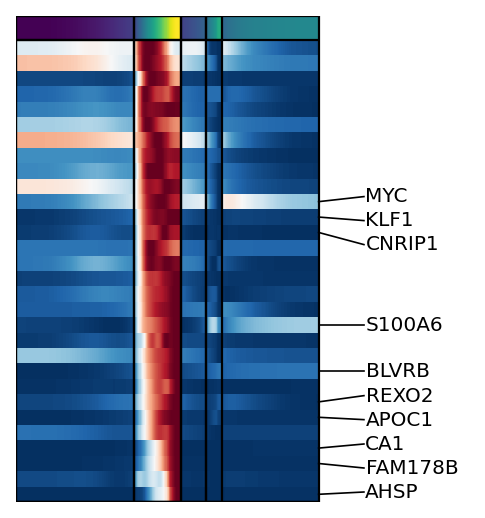

In [32]:
# Displaying results using heatmap plots
g1=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["DC","Mono","Ery"],
                 branch="Ery",
                 plot_emb=False,ordering="max",return_genes=True)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

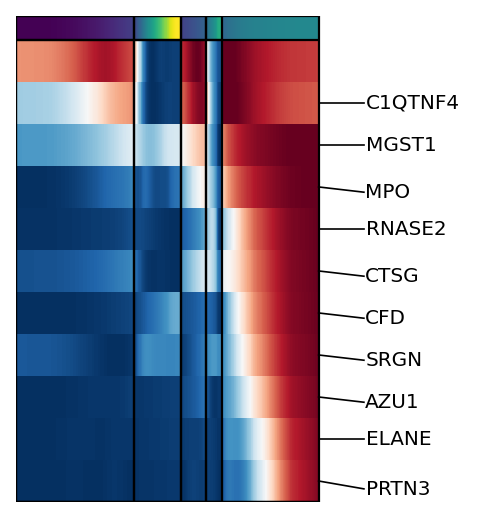

In [33]:
g2=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["DC","Mono","Ery"],
                 branch="Mono",
                 plot_emb=False,ordering="max",return_genes=True)


In [34]:
g3=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["DC","Mono","Ery"],
                 branch="DC",
                 plot_emb=False,ordering="max",return_genes=True)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [35]:
gg=g1.tolist()+g3.tolist()+g2.tolist()

In [36]:
import matplotlib.pyplot as plt
g=scf.pl.trends(adata,gg,figsize=(4,4),annot="milestones",n_features=8,
        plot_emb=False,ordering=None,return_genes=True)
plt.savefig("figures/D.pdf",dpi=300)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [37]:
# Displaying results using matrix plot
sc.set_figure_params()
scf.pl.matrix(adata,gg,norm="minmax",cmap="RdBu_r",colorbar=False,save="_F.pdf")

In [38]:
# Bifurcation analysis

In [39]:
scf.tl.test_fork(adata,root_milestone="Root",milestones=["DC","Mono"],n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression:   9%|▉         | 306/3393 [01:06<11:13,  4.59it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:   9%|▉         | 312/3393 [01:28<14:31,  3.54it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  10%|▉         | 331/3393 [01:29<13:51,  3.68it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  12%|█▏        | 424/3393 [01:37<11:23,  4.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  13%|█▎        | 433/3393 [01:41<11:36,  4.25it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  14%|█▍        | 479/3393 [01:46<10:49,  4.48it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  15%|█▌        | 517/3393 [01:48<10:05,  4.75it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  16%|█▌        | 542/3393 [01:57<10:16,  4.62it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  19%|█▉        | 654/3393 [02:15<09:26,  4.83it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  22%|██▏       | 757/3393 [02:36<09:05,  4.83it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  23%|██▎       | 767/3393 [02:38<09:03,  4.83it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  23%|██▎       | 768/3393 [02:42<09:15,  4.72it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  26%|██▌       | 874/3393 [02:59<08:38,  4.86it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  26%|██▌       | 886/3393 [03:02<08:36,  4.85it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  29%|██▉       | 1000/3393 [03:23<08:08,  4.90it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  30%|███       | 1021/3393 [03:41<08:34,  4.61it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 1041/3393 [03:42<08:22,  4.68it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 1053/3393 [03:43<08:16,  4.72it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  32%|███▏      | 1093/3393 [03:45<07:54,  4.85it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  35%|███▍      | 1186/3393 [03:58<07:23,  4.97it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  36%|███▌      | 1225/3393 [04:01<07:08,  5.06it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  37%|███▋      | 1240/3393 [04:08<07:11,  4.99it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  38%|███▊      | 1288/3393 [04:20<07:06,  4.94it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  39%|███▉      | 1334/3393 [04:28<06:54,  4.97it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|███▉      | 1342/3393 [04:35<07:01,  4.87it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|███▉      | 1346/3393 [04:36<07:00,  4.87it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|████      | 1365/3393 [04:43<07:00,  4.82it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  41%|████▏     | 1404/3393 [04:46<06:46,  4.90it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  42%|████▏     | 1431/3393 [04:49<06:36,  4.95it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  43%|████▎     | 1447/3393 [04:52<06:32,  4.95it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  43%|████▎     | 1474/3393 [05:00<06:30,  4.91it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  45%|████▌     | 1529/3393 [05:04<06:11,  5.02it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  46%|████▋     | 1573/3393 [05:09<05:57,  5.09it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  47%|████▋     | 1587/3393 [05:12<05:55,  5.08it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  49%|████▉     | 1679/3393 [05:28<05:35,  5.11it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  50%|█████     | 1710/3393 [05:32<05:27,  5.14it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  52%|█████▏    | 1769/3393 [05:44<05:16,  5.13it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1787/3393 [05:47<05:12,  5.14it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  53%|█████▎    | 1809/3393 [05:50<05:07,  5.15it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  54%|█████▍    | 1827/3393 [05:56<05:05,  5.13it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  55%|█████▌    | 1877/3393 [06:03<04:53,  5.17it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  56%|█████▌    | 1890/3393 [06:06<04:51,  5.16it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  57%|█████▋    | 1931/3393 [06:12<04:42,  5.18it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  57%|█████▋    | 1937/3393 [06:16<04:42,  5.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  58%|█████▊    | 1962/3393 [06:19<04:36,  5.17it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  59%|█████▉    | 1995/3393 [06:26<04:31,  5.16it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  60%|██████    | 2041/3393 [06:31<04:19,  5.22it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  60%|██████    | 2050/3393 [06:34<04:18,  5.20it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  61%|██████    | 2054/3393 [06:37<04:18,  5.17it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  62%|██████▏   | 2106/3393 [06:44<04:07,  5.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  63%|██████▎   | 2147/3393 [06:50<03:58,  5.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  64%|██████▍   | 2182/3393 [06:59<03:52,  5.20it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  65%|██████▍   | 2203/3393 [07:02<03:47,  5.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  67%|██████▋   | 2290/3393 [07:13<03:28,  5.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  68%|██████▊   | 2304/3393 [07:16<03:26,  5.28it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  69%|██████▉   | 2343/3393 [07:22<03:18,  5.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  70%|███████   | 2391/3393 [07:30<03:08,  5.30it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  71%|███████   | 2401/3393 [07:31<03:06,  5.31it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  71%|███████   | 2417/3393 [07:35<03:03,  5.31it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  72%|███████▏  | 2426/3393 [07:38<03:02,  5.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  72%|███████▏  | 2440/3393 [07:41<03:00,  5.29it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  74%|███████▎  | 2500/3393 [07:49<02:47,  5.32it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  74%|███████▍  | 2519/3393 [07:52<02:44,  5.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  75%|███████▌  | 2561/3393 [07:59<02:35,  5.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  76%|███████▋  | 2588/3393 [08:04<02:30,  5.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  77%|███████▋  | 2616/3393 [08:08<02:25,  5.35it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  77%|███████▋  | 2625/3393 [08:11<02:23,  5.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  78%|███████▊  | 2653/3393 [08:16<02:18,  5.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  79%|███████▊  | 2667/3393 [08:19<02:15,  5.34it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  79%|███████▉  | 2678/3393 [08:20<02:13,  5.35it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  80%|███████▉  | 2703/3393 [08:24<02:08,  5.36it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  81%|████████  | 2751/3393 [08:32<01:59,  5.37it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  82%|████████▏ | 2775/3393 [08:36<01:54,  5.38it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  82%|████████▏ | 2780/3393 [08:36<01:53,  5.38it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  83%|████████▎ | 2800/3393 [08:40<01:50,  5.38it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  83%|████████▎ | 2812/3393 [08:42<01:48,  5.38it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  84%|████████▍ | 2855/3393 [08:49<01:39,  5.40it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  85%|████████▌ | 2895/3393 [08:55<01:32,  5.41it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  86%|████████▌ | 2912/3393 [08:58<01:28,  5.41it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  87%|████████▋ | 2963/3393 [09:05<01:19,  5.43it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  88%|████████▊ | 3000/3393 [09:12<01:12,  5.43it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  89%|████████▉ | 3016/3393 [09:14<01:09,  5.44it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  90%|█████████ | 3067/3393 [09:23<00:59,  5.44it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  91%|█████████ | 3073/3393 [09:26<00:58,  5.42it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  92%|█████████▏| 3112/3393 [09:33<00:51,  5.43it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  93%|█████████▎| 3155/3393 [09:39<00:43,  5.45it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  94%|█████████▍| 3197/3393 [09:46<00:35,  5.45it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  95%|█████████▍| 3223/3393 [09:50<00:31,  5.46it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  95%|█████████▌| 3232/3393 [09:51<00:29,  5.47it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  96%|█████████▌| 3255/3393 [09:57<00:25,  5.45it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  96%|█████████▋| 3271/3393 [09:59<00:22,  5.46it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  97%|█████████▋| 3296/3393 [10:02<00:17,  5.47it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  98%|█████████▊| 3318/3393 [10:05<00:13,  5.48it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▉| 3367/3393 [10:13<00:04,  5.49it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3378/3393 [10:16<00:02,  5.48it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3379/3393 [10:21<00:02,  5.44it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3380/3393 [10:25<00:02,  5.41it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3383/3393 [10:35<00:01,  5.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3384/3393 [10:37<00:01,  5.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3387/3393 [10:48<00:01,  5.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|█████████▉| 3388/3393 [10:51<00:00,  5.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|██████████| 3393/3393 [11:05<00:00,  5.10it/s]
    test for upregulation for each leave vs root
    upreg Mono: 100%|██████████| 792/792 [00:00<00:00, 855.79it/s] 
    finished (0:11:10) --> added 
    .uns['Root->DC<>Mono']['fork'], DataFrame with fork test results.


In [40]:
scf.tl.branch_specific(adata,root_milestone="Root",milestones=["DC","Mono"],effect=1.7)

    branch specific features: DC: 63, Mono: 23
    finished --> updated 
    .uns['Root->DC<>Mono']['fork'], DataFrame updated with additionnal 'branch' column.


In [41]:
# Early gene detection
scf.tl.activation_lm(adata,root_milestone="Root",milestones=["DC","Mono"],n_jobs=20)

    single mapping
    prefork activation: 100%|██████████| 86/86 [00:00<00:00, 572.73it/s]
    40 early and 23 late features specific to leave DC
    16 early and 7 late features specific to leave Mono
    finished (0:00:00) --> updated 
    .uns['Root->DC<>Mono']['fork'], DataFrame updated with additionnal 'slope','pval','fdr','prefork_signi' and 'module' columns.


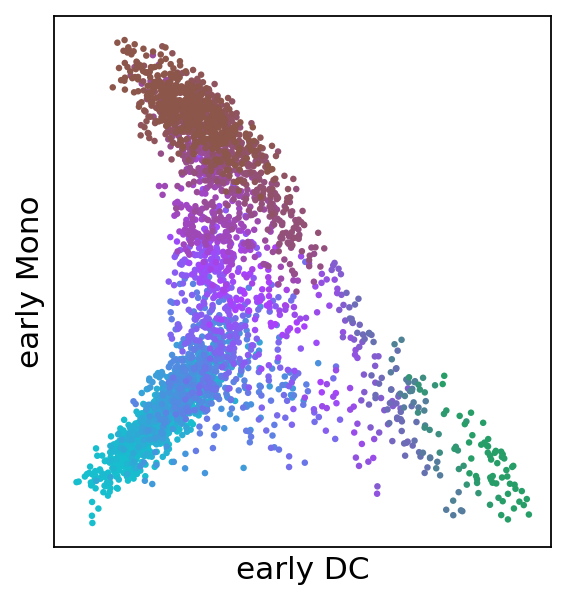

In [42]:
scf.pl.modules(adata,root_milestone="Root",milestones=["DC","Mono"],
               smooth=True,module="early",save="_G.pdf")

In [43]:
# Repulsion of early gene modules
scf.tl.slide_cells(adata,root_milestone="Root",milestones=["DC","Mono"],win=400)

--> added 
    .uns['Root->DC<>Mono']['cell_freq'], probability assignment of cells on 9 non intersecting windows.


In [44]:
scf.tl.slide_cors(adata,root_milestone="Root",milestones=["DC","Mono"])

--> added 
    .uns['Root->DC<>Mono']['corAB'], gene-gene correlation modules.


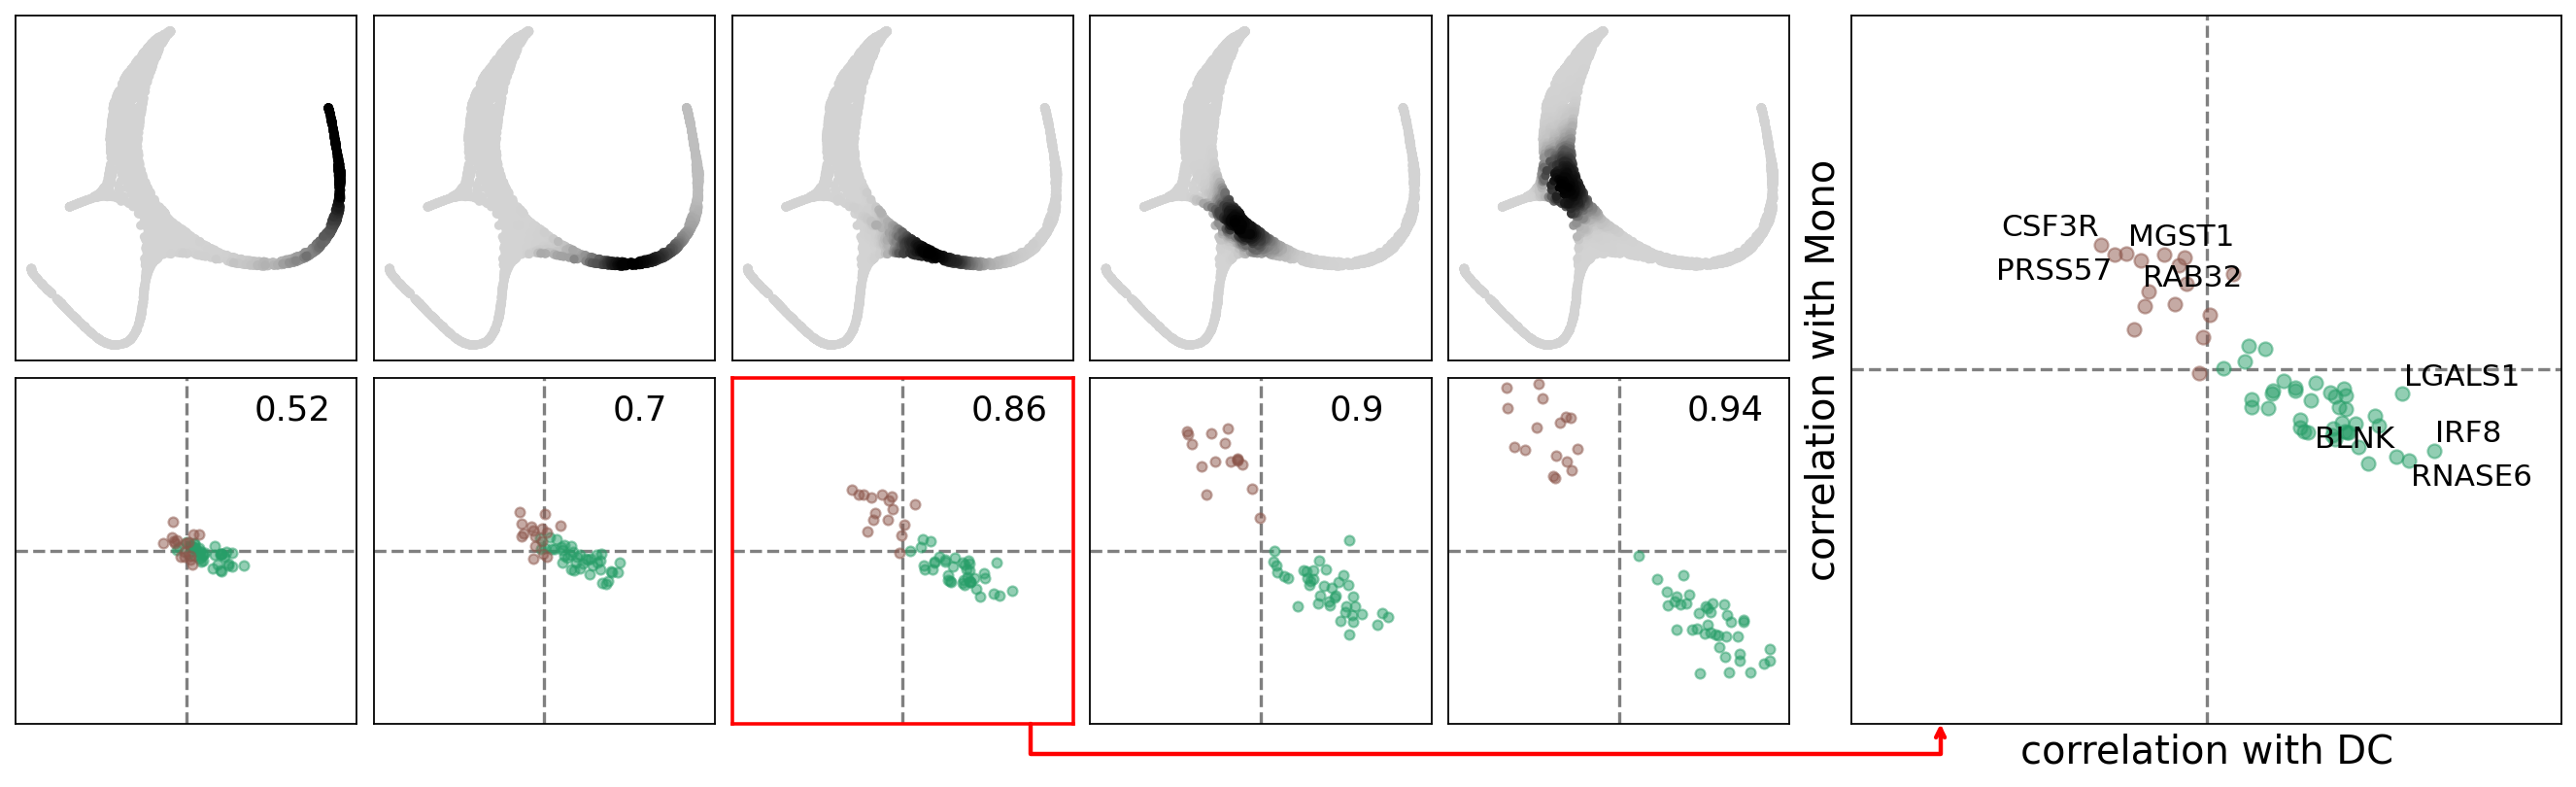

In [45]:
sc.set_figure_params()
scf.pl.slide_cors(adata,root_milestone="Root",milestones=["DC","Mono"],basis="draw_graph_fa",win_keep=[0,2,3,4,5],
                 focus=2,save="_H.pdf")

In [46]:
# Local trend of module correlations
scf.tl.synchro_path(adata,root_milestone="Root",milestones=["DC","Mono"],w=100,n_map=50,n_jobs=20)

computing local correlations
    multi mapping:  96%|█████████▌| 48/50 [00:22<00:00,  2.13it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    multi mapping permutations: 100%|██████████| 50/50 [00:26<00:00,  1.92it/s]
    finished (0:01:28) --> added 
    .uns['Root->DC<>Mono']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Root->DC<>Mono'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


In [47]:
scf.pl.synchro_path(adata,root_milestone="Root",milestones=["DC","Mono"],save="_I.pdf")

In [48]:
# Formation of fate-specific modules

In [49]:
scf.tl.module_inclusion(adata,root_milestone="Root",milestones=["DC","Mono"],n_jobs=20,n_map=50,parallel_mode="mappings")

Calculating onset of features within their own module
    multi mapping:  98%|█████████▊| 49/50 [01:15<00:01,  1.53s/it]

by .GlobalEnv when processing object ‘aa’


    multi mapping: 100%|██████████| 50/50 [01:40<00:00,  2.02s/it]
    finished (0:01:40) --> added 
    .uns['Root->DC<>Mono']['module_inclusion'], milestone specific dataframes containing inclusion timing for each gene in each probabilistic cells projection.
    .uns['Root->DC<>Mono']['fork'] has been updated with the column 'inclusion'.


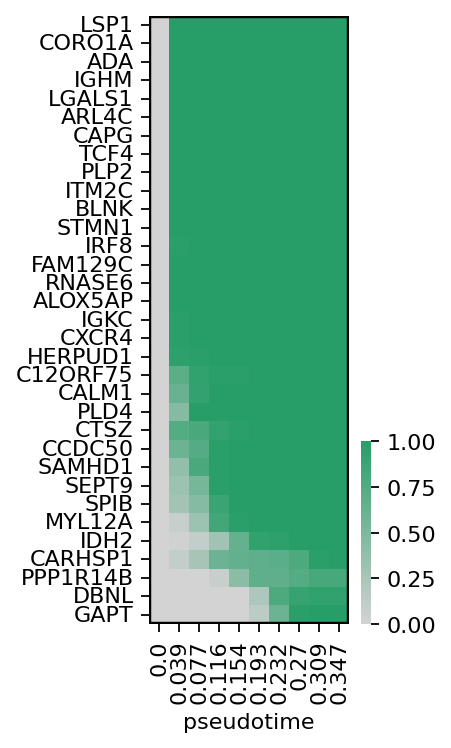

In [50]:
sc.set_figure_params(fontsize=10)
scf.pl.module_inclusion(adata,root_milestone="Root",milestones=["DC","Mono"],
                        bins=10,branch="DC",save="_J1.pdf",figsize=(2,5))

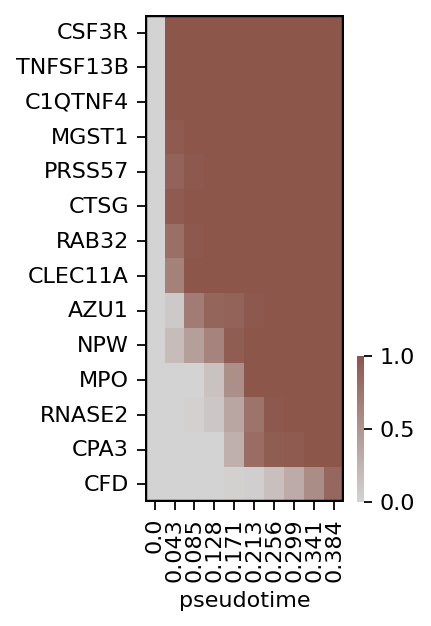

In [51]:
scf.pl.module_inclusion(adata,root_milestone="Root",milestones=["DC","Mono"],bins=10,branch="Mono",
                       save="_J2.pdf",figsize=(2,4))